# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Features linguistiques

---

# Observations et environnement
---

In [1]:
import sys
sys.version_info

sys.version_info(major=3, minor=11, micro=0, releaselevel='final', serial=0)

In [2]:
cd ../..

/Users/fm/Desktop/Work/Patat


In [3]:
import importlib
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Paramètres globaux

In [4]:
random_state = 42

## Données d'entrainement

In [5]:
df_texts_recueil = pd.read_csv('data/demo/221123-TextInfox.csv')

In [6]:
df_infox = df_texts_recueil[df_texts_recueil['infox']==1.0].copy()

In [7]:
df_infox = df_infox.reset_index()

# Experience
---
## Feature engineering
- Quantity: number of syllables, words, and sentences
- Vocabulary complexity: number of syllables per word, infrequent words
- Grammatical complexity: sentence length, Flesh–Kincaid readability criterion, average number of words per sentence, number of conjunctions;

Et comparaisons avec LexAnalyser


In [8]:
import spacy
from spacy.language import Language

/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
spacy.info()

{'spacy_version': '3.4.4',
 'location': '/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/spacy',
 'platform': 'macOS-13.1-arm64-arm-64bit',
 'python_version': '3.11.0',
 'pipelines': {'fr_core_news_lg': '3.4.0'}}

In [10]:
#nlp = spacy.load("fr_core_news_sm")
nlp = spacy.load("fr_core_news_lg")
#nlp = spacy.load("fr_dep_news_trf")

In [11]:
def get_spacy_doc(text):
    print(text[:80])
    return nlp(text)

In [12]:
df_spacy = df_texts_recueil[['infox','text']].copy()

In [13]:
%%time
df_spacy['spacy_doc'] = df_spacy['text'].apply(get_spacy_doc)

Quatre morts dans un accident de la route sur un pont reliant la France et l'All
Consommation : les Français boudent les distributeurs automatiques de billets
Le
Avortement : le choix des Irlandais
En Irlande, lors du référendum, les électeur
Une ex de Cristiano Ronaldo compare porno et téléréalité (vidéo)
Elle avait mis 
Levée du statut de détenu signalé de Colonna, nouvelles manifestations en Corse

Comment fonctionne le système de « Burning » dans la crypto ?
On entend souvent 
Info trafic RATP - Paris: la station Concorde fermée ce mardi matin [MAJ]
Le tra
Les étoiles de 2020 : à Hong Kong, Elise aide des prisonniers à envoyer des fleu
Incendies en Algérie : au moins 38 morts, des scènes de désolation après les feu
Face aux mains baladeuses, Miss France est intransigeante
Vaimalama Chaves est u
USA - Les tribulations d'un  médecin prescripteur d'ivermectine
De : Children He
L’Union européenne et sa commande de 4,4 milliards de doses de vaccins jusqu’en 
"Un président doit savoir pr

Rumble déclare qu’il ne modifiera pas sa politique pour satisfaire les exigences
Ne vous inquiétez pas, nous ne manquerons jamais de pétrole
Quand serons-nous à 
10 raisons pour lesquelles le multivers pourrait être réel et pourquoi nous pour
Faux-semblants et vraies raisons du recul de l’âge de départ à la retraite
Les q
Incroyable surprise : le repli identitaire islamiste se renforcerait en France !
La Manif pour tous : dix ans après, que reste-t-il ?
Dix ans déjà. Le 2 novembre
[Edito] Soirée en non-mixité d’Élisabeth Borne : imaginez une minute que Jean Ca
Pour les féministes, Miss France est discriminatoire… et ça se règle aux prud’ho
Tests – vaccins – pass : fabrique de la panique, braquage des comptes publics
Ce
Covid-19. La pandémie et les vaccins, pour mieux justifier un coup d’Etat mondia
Covid-19. Une épidémie quasiment terminée avant l’été au niveau mondial
Voici mo
Piscine, voile, ramadan : scènes de la vie ordinaire dans un prestigieux lycée
O
Faut-il vous métisser comme 

L'Europe a "des solutions pour devenir indépendante du gaz russe", affirme Bruno
Xavier Gorce : quand on n’a que la haine...
TRIBUNE — Le dessinateur Xavier Gorc
Yvan Colonna: les députés prévoient d'auditionner des cadres de la pénitentiaire
Le gouvernement annonce un "vaste" plan de contrôle des 7.500 Ehpad en deux ans

24 heures dans la peau d’une femme
ÉDITO — Aujourd'hui, mardi 8 mars 2022, c'est
Finlande et Suède dans l'Otan? Des adhésions non issues du pacte de Varsovie, un
Biométrie dans l'espace public: le rapport du Sénat se veut rassurant mais laiss
Confinement strict: des centaines de Chinois ont fui l'usine de Quanta
En proie 
Etats-Unis: la Floride fait du 7 novembre la "Journée des victimes du communisme
A Toulouse, un téléphérique connecté au métro
Toulouse prend de la hauteur en me
De l’importance de la "libre-pensée"
EDITO - Dixit Wikipédia (1) : la libre-pens
Elisabeth Borne nommée Première ministre: Macron a choisi une femme pour Matigno
"Nous marchons vers la guerr

Coup de tonnerre en Espagne : le gouvernement des BalÃ©ares avoue que 16 personn
Coup de thÃ©Ã¢tre : une revue scientifique mondiale confirme que le vaccin provo
Gros scandale en France : en pleine crise financière, l’Etat va emprunter 270 mi
France : la plainte contre le professeur Perronne rejetÃ©e, en colÃ¨re, l’Ordre 
La Russie crache le morceau : “le but des Etats-Unis est d’affaiblir l’Europe mi
Gros scandale aux USA : en seulement 9 mois de guerre, les Etats-Unis ont versÃ©
Bill Gates continue de manipuler l’OMS avec ses milliards !
Il n’y a que les cov
Les décès excessifs sont en augmentation mais ATTENTION, pas à cause de Covid !

1 milliard de Chinois touchés par un piratage de leurs données personnelles
Plus
Manifestations importantes d’agriculteurs aux Pays-Bas, la police tire sur les m
Quand Darmanin dînait avec l’imam Iquioussen, qu’il veut à présent expulser
S‘il
Météo : le froid s’empare de la France, faut-il s’alarmer d’un refroidissement c
Suède : fin de la recommanda

La véritable raison de la volonté de l’UE d’imposer un embargo sur le pétrole ru
Expériences   américaines d'infection d'enfants par la  tuberculose , selon les 
Les codes Bluetooth émis par les vaccinés
De : https://www.cielvoile.fr/2022/01/
Qu’est-ce que le « Grand Reset » et que veulent réellement les globalistes ?
J’a
Le Dr Zelenko raconte  comment le MSM a sali sa réputation  pour avoir révélé le
ENQUÊTE  5G sur les  sabotages d'antennes
De :https://reporterre.net/Exclusif-la
Augmentation de 2000 % des lésions cérébrales après vaccination
De : https://www
Les convulsions post-vaccinales des enfants de 2 et 3 ans
De : https://www.natur
Enfants vaccinés  = de 8100% à 30200% plus de risque de mourir  que les non-vacc
Vaccins Covid-19 et escrocs associés
De : https://www.naturalnews.com/2022-07-11
Mais qu’ont-ils fait les peuples pour qu’on les haïsse de la sorte !
De : https:
L'Europe occidentale n'a pas besoin de gaz russe si elle adopte la technologie d
UKRAINE  - LES BÛCHERS DE LA

« LETTRE OUVERTE A LA FRANCE ET AUX NATIONS »
L’un de nos lecteurs (ou l’une de 
ALERTE – Vaccins COVID Un scientifique britannique révèle une analyse de  donnée
Tour de France – Abandon de Victor Lafay :« On est tous négatifs aux  tests Covi
Un rapport du gouvernement britannique admet que 18,9 millions de  personnes ne 
Le bureau de l’Académie de Médecine expose sa complicité d’empoisonnement en ban
Aujourd’hui, 4 documents très courts pour vous garder éveillés et occuper votre 
Les laboratoires du Pentagone et la dépopulation
par Dragomir Bojkov.
La vice-pr
La fin de la Pax Americana : De la chute d’un empire
par Andreas Mölzer.
C’est l
La maladie des ondes radio : l’histoire de l’électrohypersensibilité
Au cours de
Il n’y a pas de Crise Climatique dans le Monde !
Il n’y a pas de crise climatiqu
L’effet Kiss Coll de la guerre
Par WD


Nous sommes imbriqués dans l’Otan. Ce qu
Délitement, décadence, écroulement… Fin?
Place d’Armes Ile de France : le 23 aoû
L’Euthanasie des personnes e

In [14]:
from collections import Counter
def get_linguistic_features(row):
    text = row['text']
    doc = row['spacy_doc']
    nb_token = len(doc)
    row['nb_token'] = nb_token
    row['nb_sent'] = len(row['text'].split('.'))
    row['nb_exclam'] = text.count('?')+text.count('!')+text.count('(')+text.count(')')
    token_pos = [token.pos_ for token in doc]
    pos_counter = Counter(token_pos)
    for pos in pos_counter:
        row[pos] = pos_counter[pos]    
    return row

In [15]:
%%time
df_features = df_spacy.apply(get_linguistic_features, axis=1)

CPU times: user 1.53 s, sys: 22.8 ms, total: 1.55 s
Wall time: 1.57 s


In [16]:
df_features = df_features.fillna(0)

In [17]:
df_features

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,...,SPACE,SYM,VERB,X,infox,nb_exclam,nb_sent,nb_token,spacy_doc,text
0,13.0,47,11.0,22.0,7.0,51,0.0,68,8.0,8,...,2,0.0,25,0.0,0.0,4,13,308,"(Quatre, morts, dans, un, accident, de, la, ro...",Quatre morts dans un accident de la route sur ...
1,12.0,36,18.0,6.0,3.0,36,0.0,59,7.0,12,...,4,0.0,21,0.0,0.0,1,13,249,"(Consommation, :, les, Français, boudent, les,...",Consommation : les Français boudent les distri...
2,19.0,34,21.0,12.0,4.0,36,0.0,55,3.0,14,...,4,0.0,21,0.0,0.0,3,14,284,"(Avortement, :, le, choix, des, Irlandais, \n,...",Avortement : le choix des Irlandais\nEn Irland...
3,13.0,53,26.0,17.0,7.0,45,0.0,72,7.0,42,...,9,0.0,37,0.0,0.0,6,13,412,"(Une, ex, de, Cristiano, Ronaldo, compare, por...",Une ex de Cristiano Ronaldo compare porno et t...
4,39.0,159,12.0,39.0,12.0,118,0.0,192,7.0,36,...,21,0.0,69,1.0,0.0,8,28,882,"(Levée, du, statut, de, détenu, signalé, de, C...","Levée du statut de détenu signalé de Colonna, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,611.0,1329,411.0,350.0,200.0,1167,0.0,1597,219.0,425,...,87,0.0,747,265.0,1.0,101,314,9452,"(11, septembre, 2001, :, La, théorie, du, «, c...",11 septembre 2001 : La théorie du « complot pi...
607,43.0,79,45.0,39.0,15.0,75,1.0,92,9.0,60,...,17,0.0,85,37.0,1.0,6,32,768,"(Selon, un, ancien, conseiller, du, Pentagone,...","Selon un ancien conseiller du Pentagone, les É..."
608,36.0,68,17.0,13.0,11.0,73,0.0,71,0.0,17,...,8,0.0,51,1.0,1.0,0,15,450,"(La, Pologne, s’, apprête, à, s’, emparer, du,...",La Pologne s’apprête à s’emparer du territoire...
609,386.0,749,318.0,144.0,203.0,654,0.0,976,33.0,370,...,79,0.0,426,1.0,1.0,113,129,4950,"(Exclusivité, WikiStrike, :, un, physicien, en...",Exclusivité WikiStrike: un physicien en colère...


In [20]:
no_scale_columns = ['infox','nb_token', 'spacy_doc', 'text'] 
df_X = df_features.drop(columns=['infox', 'spacy_doc', 'text']).astype(int)
y = df_features['infox'].astype(int)

In [21]:
df_X

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
0,13,47,11,22,7,51,0,68,8,8,19,27,0,2,0,25,0,4,13,308
1,12,36,18,6,3,36,0,59,7,12,3,29,3,4,0,21,0,1,13,249
2,19,34,21,12,4,36,0,55,3,14,5,50,6,4,0,21,0,3,14,284
3,13,53,26,17,7,45,0,72,7,42,23,56,5,9,0,37,0,6,13,412
4,39,159,12,39,12,118,0,192,7,36,61,111,5,21,0,69,1,8,28,882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,611,1329,411,350,200,1167,0,1597,219,425,713,1188,143,87,0,747,265,101,314,9452
607,43,79,45,39,15,75,1,92,9,60,69,83,19,17,0,85,37,6,32,768
608,36,68,17,13,11,73,0,71,0,17,30,51,3,8,0,51,1,0,15,450
609,386,749,318,144,203,654,0,976,33,370,90,464,57,79,0,426,1,113,129,4950


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
606    1
607    1
608    1
609    1
610    1
Name: infox, Length: 611, dtype: int64

In [23]:
def normalize(row):
    nb_token = row['nb_token']
    row = row.apply(lambda x : x/nb_token)
    row['nb_token'] = nb_token
    return row

In [24]:
df_X_norm = df_X.apply(normalize,axis=1)

In [25]:
df_X_norm

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
0,0.042208,0.152597,0.035714,0.071429,0.022727,0.165584,0.000000,0.220779,0.025974,0.025974,0.061688,0.087662,0.000000,0.006494,0.0,0.081169,0.000000,0.012987,0.042208,308.0
1,0.048193,0.144578,0.072289,0.024096,0.012048,0.144578,0.000000,0.236948,0.028112,0.048193,0.012048,0.116466,0.012048,0.016064,0.0,0.084337,0.000000,0.004016,0.052209,249.0
2,0.066901,0.119718,0.073944,0.042254,0.014085,0.126761,0.000000,0.193662,0.010563,0.049296,0.017606,0.176056,0.021127,0.014085,0.0,0.073944,0.000000,0.010563,0.049296,284.0
3,0.031553,0.128641,0.063107,0.041262,0.016990,0.109223,0.000000,0.174757,0.016990,0.101942,0.055825,0.135922,0.012136,0.021845,0.0,0.089806,0.000000,0.014563,0.031553,412.0
4,0.044218,0.180272,0.013605,0.044218,0.013605,0.133787,0.000000,0.217687,0.007937,0.040816,0.069161,0.125850,0.005669,0.023810,0.0,0.078231,0.001134,0.009070,0.031746,882.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.064642,0.140605,0.043483,0.037029,0.021160,0.123466,0.000000,0.168959,0.023170,0.044964,0.075434,0.125688,0.015129,0.009204,0.0,0.079031,0.028036,0.010686,0.033220,9452.0
607,0.055990,0.102865,0.058594,0.050781,0.019531,0.097656,0.001302,0.119792,0.011719,0.078125,0.089844,0.108073,0.024740,0.022135,0.0,0.110677,0.048177,0.007812,0.041667,768.0
608,0.080000,0.151111,0.037778,0.028889,0.024444,0.162222,0.000000,0.157778,0.000000,0.037778,0.066667,0.113333,0.006667,0.017778,0.0,0.113333,0.002222,0.000000,0.033333,450.0
609,0.077980,0.151313,0.064242,0.029091,0.041010,0.132121,0.000000,0.197172,0.006667,0.074747,0.018182,0.093737,0.011515,0.015960,0.0,0.086061,0.000202,0.022828,0.026061,4950.0


## Exploration des Features


### Taille des articles

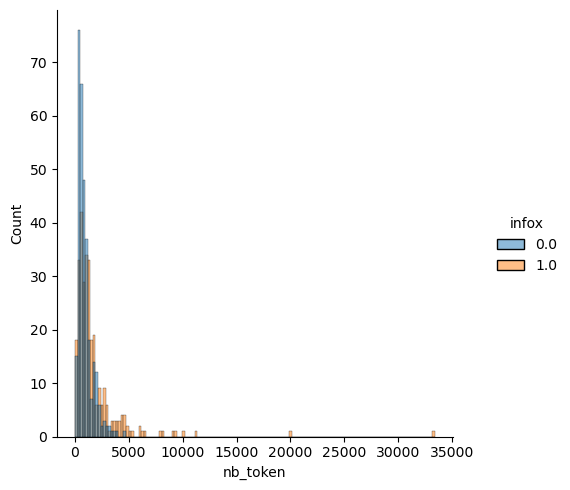

In [26]:
sns.displot(df_features,x='nb_token',hue='infox')

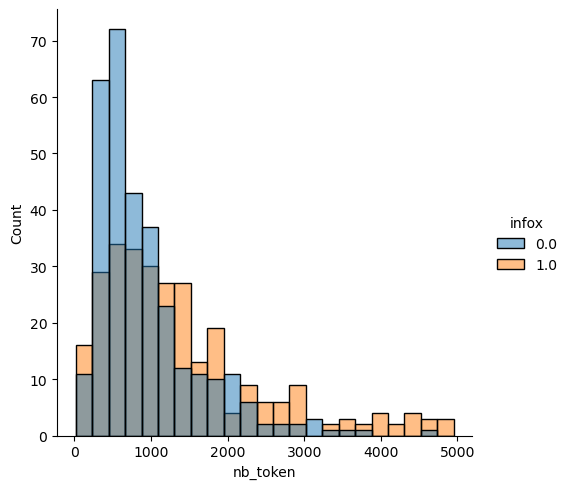

In [27]:
max_nb_token = 5000
sns.displot(df_features[df_features['nb_token']<max_nb_token],x='nb_token',hue='infox')

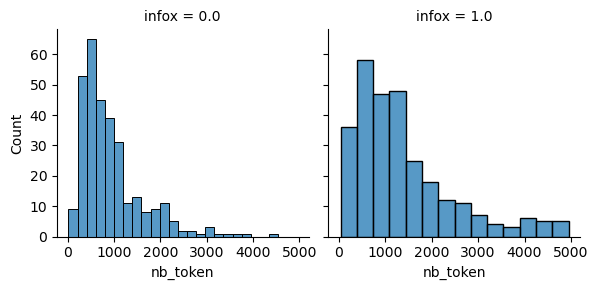

In [28]:
g = sns.FacetGrid(df_features[df_features['nb_token']<max_nb_token], col="infox")
g.map(sns.histplot, "nb_token")

In [30]:
mean_0 = df_X_norm[y==0]['nb_token'].mean()
mean_1 = df_X_norm[y==1]['nb_token'].mean()
print(f"Taille moyenne 1 : {mean_1}")
print(f"Taille moyenne 0 : {mean_0}")
print(f"Ratio : {mean_1/mean_0}")

Taille moyenne 1 : 1796.591973244147
Taille moyenne 0 : 929.3108974358975
Ratio : 1.9332518086263735


Les infox sont presque deux fois plus longues que les autres articles
On travaillera sur les features normalisées = df_X_norm

### Comparaison moyenne autres features

In [31]:
desc_1 = df_X_norm[y==1].describe()
desc_0 = df_X_norm[y==0].describe()

In [32]:
df_desc_ratio =(desc_1/desc_0).loc[['mean']].T.sort_values('mean')

In [33]:
pos_names = {
    'ADJ': 'adjective',
    'ADP': 'adposition',
    'ADV': 'adverb',
    'AUX': 'auxiliary',
    'CCONJ': 'coordinating conjunction',
    'DET': 'determiner',
    'INTJ': 'interjection',
    'NOUN': 'noun',
    'NUM': 'numeral',
    'PART': 'particle',
    'PRON': 'pronoun',
    'PROPN': 'proper noun',
    'PUNCT': 'punctuation',
    'SCONJ': 'subordinating conjunction',
    'SYM': 'symbol',
    'VERB': 'verb',
    'X': 'other',
}

In [35]:
df_desc_ratio['comment'] = df_desc_ratio.index.map(lambda pos : pos_names.get(pos,''))
df_desc_ratio

,mean,comment
INTJ,0.894396,interjection
PUNCT,0.931153,punctuation
ADP,0.946825,adposition
NOUN,0.959132,noun
PROPN,0.982110,proper noun
DET,0.994586,determiner
VERB,1.005995,verb
nb_sent,1.006511,
NUM,1.006593,numeral
AUX,1.049252,auxiliary


### Tokens non répertoriés

In [36]:
df_features.sort_values('X',ascending=False)[['X','text']].head(30)

,X,text
373,559.0,Voici tout ce que les médias ne vous diront pa...
522,411.0,La maladie des ondes radio : l’histoire de l’é...
164,300.0,"Attentats, crimes, tueries et autres atrocités..."
27,265.0,MODERNA - L' étude toxicologique du vaccin ...
606,265.0,11 septembre 2001 : La théorie du « complot pi...
38,202.0,Le ginseng du pauvre contre le covid\nDe : htt...
288,149.0,Anthony Fauci : d'une gestion de crise controv...
213,135.0,"Etats-Unis: la Floride fait du 7 novembre la ""..."
465,110.0,Trump revient en force : « Je suis pour les ar...
370,105.0,"Le procureur nommé par Trump, David Weiss, env..."


In [37]:
def get_X(doc):
    result = ''
    for token in doc:
        if token.pos_=='X':
            print(token)
            result = result + ' ' + token.text
    return result

In [38]:
# Recherche des POS X
df_features['X_words'] = df_features['spacy_doc'].apply(get_X)

Corsica
burning
to
Smart
Smart
flowers
with
Kala
Kala
C8
USA
Children
Health
Defense
and
Drug
King
in
vitro
in
vitro
Line
Critical
Care
Alliance
s
Health
Defence
von
der
act
UkraineLe
CNN
Institutes
of
Health
the
Global
Day
of
for
the
Amazon
optical
depth
the
extent
and
of
from
the
regions
fire
season
since
for
Disease
Control
and
The
Defender
for
Disease
Control
and
Event
Reporting
and
Drug
s
Health
Defence
The
National
Institutes
of
Health
The
Association
Cash
Draw
Checkers
New
’
Yogi
The
Real
in
RéseauInternational
4.René
in
in
Deep
State
of
Unrest
The
Economic
Unrest
The
Economic
DoJ
Drug
and
Cosmetic
Act
Support
for
Public
Event
Reporting
and
Drug
Document
Mc
‘
Capture
and
lockdown
policies
in
Western
Europe
countries
have
no
the
and
review
and
of
the
effects
of
january
stay
-
at
home
and
business
closure
effects
the
spread
of
means
we
a
new
The
3).(1
I
Protein
Degradation
of
Front
in
-
associated
Zika
against
coronaviruses
in
domestic
animals
The
current
pandemic
of
search
for
Th

Great
Australian
Grant
tells
the
World
Economic
we
of
freedom
of
pic.twitter.com/zEq72wFhNf—
boasts
at
the
World
Economic
about
the
development
carbon
to
monitor
what
buy
eat
and
where
how
travel
Global
Global
State
Security
Agency
Tailored
Access
archaeological
-
in
https://www.francesoir.fr/societe-sante/revenus-verses-par-big-pharma-partir-de-douze-un-foyer-epidemique-de-conflits
von
der
of
Defense
Threat
Park
Army
Reed
Research
Institute
Depuis
Politics
National
Health
The
National
Health
and
Post
Zika
Click
to
and
Global
Footprint
Network
Global
Footprint
Network
Global
Footprint
Network
Global
Footprint
Network
s
Health
Defense
Build
Back
Better
New
’
’
Business
School
Human
Life
International
Diet
of
and
England
Journal
of
New
England
Journal
of
Pulse
Koh
karting
Delliste
karting
The
is
already
here
it’
s
just
not
evenly
distributed
https://t.co/Dg5dzlamMm—
The
Great
Reset
Pfizer'
new
tech
to
pill
with
a
tiny
chip
that
wireless
to
authorities
when
the
pharmaceutical
has
Imagine


In [39]:
df_features.sort_values('X',ascending=False)['X_words'].head(30)

373     Public Policy Fellowship Democratic years ago...
522     The Zapping of New The Health Hazards of Disp...
164     Al Al News Joint Task / Islamic State of the ...
27      Zika against coronaviruses in domestic animal...
606     was was 9/11 made in Israel The Plot Against ...
38      in in in vivo in vitro in in vitro in vivo in...
288     Perronne I know dedicated with wisdom and ins...
213     Tower Today I established 7th as Victims of D...
465     may have to do it at for during a # rally in ...
370     News While trying to up a Chinese private equ...
579     Global School of Head of the World Economic a...
272     CBS Blue Terrifying how swiftly and the corpo...
413     have conducted illegal were Russians living i...
114     of Native American - European Test Reference ...
55      Au posteriori Are the clinical effects of of ...
165     Deep State Durham bank Bank Bank Bank Bank Ba...
376     Checker while I call BS True the Media Group ...
115     Pacific “ “ Asserting t

In [40]:
df_X_norm.sort_values('X',ascending=False).head(30)

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
27,0.057348,0.060215,0.016487,0.013620,0.018638,0.032258,0.000000,0.158423,0.013620,0.024373,0.238710,0.108961,0.007168,0.004301,0.004301,0.051613,0.189964,0.030824,0.121864,1395.0
315,0.042683,0.115854,0.036585,0.024390,0.012195,0.091463,0.000000,0.146341,0.012195,0.048780,0.085366,0.091463,0.006098,0.030488,0.000000,0.079268,0.176829,0.030488,0.048780,164.0
465,0.047328,0.097710,0.035115,0.033588,0.016794,0.071756,0.000000,0.143511,0.018321,0.056489,0.077863,0.151145,0.013740,0.010687,0.000000,0.058015,0.167939,0.027481,0.041221,655.0
441,0.052117,0.120521,0.035831,0.032573,0.009772,0.107492,0.000000,0.166124,0.039088,0.048860,0.039088,0.123779,0.003257,0.009772,0.000000,0.084691,0.127036,0.013029,0.052117,307.0
213,0.047994,0.141834,0.019341,0.029370,0.020057,0.119628,0.000000,0.194842,0.012894,0.031519,0.065186,0.116762,0.012894,0.019341,0.000000,0.071633,0.096705,0.010745,0.024355,1396.0
431,0.045652,0.136957,0.032609,0.028261,0.008696,0.097826,0.000000,0.176087,0.021739,0.036957,0.089130,0.093478,0.008696,0.054348,0.000000,0.073913,0.095652,0.017391,0.034783,460.0
373,0.067102,0.116131,0.046519,0.033635,0.020248,0.103246,0.000335,0.162985,0.015395,0.051372,0.071954,0.114123,0.015730,0.004351,0.000669,0.082664,0.093541,0.018072,0.037483,5976.0
314,0.040639,0.108853,0.034833,0.023222,0.017417,0.095791,0.000000,0.139332,0.027576,0.031930,0.191582,0.092888,0.008708,0.034833,0.002903,0.059507,0.089985,0.013062,0.034833,689.0
282,0.049351,0.127273,0.023377,0.025974,0.015584,0.106494,0.000000,0.171429,0.025974,0.028571,0.111688,0.129870,0.000000,0.031169,0.000000,0.067532,0.085714,0.012987,0.033766,385.0
522,0.065528,0.106831,0.025616,0.023233,0.025616,0.082208,0.000000,0.207109,0.033956,0.022637,0.092137,0.152105,0.008141,0.021446,0.000596,0.051231,0.081612,0.020056,0.062351,5036.0


In [41]:
len(df_X_norm[df_X_norm['X']<0.01])

500

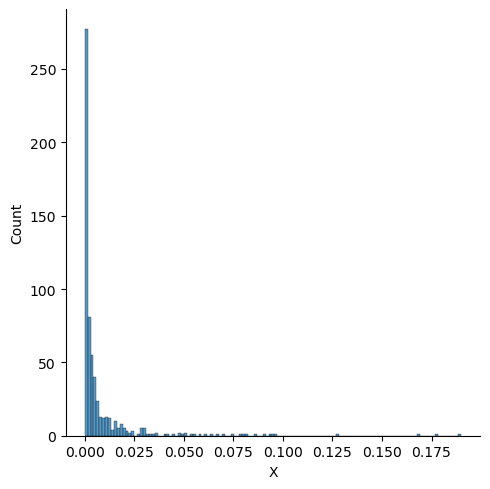

In [42]:
sns.displot(df_X_norm,x='X')

## Benchmark

### Initialisations

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
#from sklearn.metrics import roc_curve

In [44]:
#X=df_features[['nb_token','PART','X']]
X = df_features.drop(columns=['infox','spacy_doc', 'text','X_words'])
#X= df_X_norm
y=df_features['infox']

In [45]:
train_size=0.8
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=train_size)

### Benchmark

In [46]:
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import HistGradientBoostingClassifier

In [47]:
predictors = {
    "Logistic Regression" : LogisticRegression(random_state=random_state, max_iter=1000),
    "Neural Network" : MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=random_state),
    "RBF SVM" : SVC(gamma=2, C=1, probability=True, random_state=random_state),
    "Gaussian Naive Bayes" : GaussianNB(),
    "Multinomial Naive Bayes" : MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None),
#    "Nearest Neighbors" : KNeighborsClassifier(3),
    "Linear SVM" : SVC( C=0.025, probability=True, random_state=random_state),
    "Gaussian Process" : GaussianProcessClassifier(1.0 * RBF(1.0), random_state=random_state),
    "Decision Tree" : DecisionTreeClassifier(max_depth=100, random_state=random_state),
    "Random Forest" : RandomForestClassifier(max_depth=100, n_estimators=10, max_features=1, random_state=random_state),
    "AdaBoost" : AdaBoostClassifier(random_state=random_state),
    "QDA" : QuadraticDiscriminantAnalysis(),
    'Gradient Boosting': HistGradientBoostingClassifier(random_state=random_state),
    'Dummy' : DummyClassifier(strategy='uniform', random_state=random_state),
}


In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_state,train_size=0.75)
y_preds = {}
y_probas = {}
fit_times = {}
proba_times = {}

#for name, classifier in zip(names, classifiers):
for name in predictors.keys():
    
    classifier = predictors[name]
    print(f'Training {name}')
    
    start = time.time()
    classifier.fit(X_train, y_train)
    stop = time.time()
    fit_times[name] = stop - start
    
    print(f'Training time : {fit_times[name]} s')
    
    y_preds[name] = classifier.predict(X_test)
    
    start = time.time()
    y_probas[name] = classifier.predict_proba(X_test)
    stop = time.time()
    proba_times[name] = stop - start
print('Done !')

Training Logistic Regression
Training time : 0.04156613349914551 s
Training Neural Network
Training time : 0.14134001731872559 s
Training RBF SVM
Training time : 0.04814314842224121 s
Training Gaussian Naive Bayes
Training time : 0.0006787776947021484 s
Training Multinomial Naive Bayes
Training time : 0.0007579326629638672 s
Training Linear SVM
Training time : 0.04482316970825195 s
Training Gaussian Process
Training time : 0.4292740821838379 s
Training Decision Tree
Training time : 0.004673957824707031 s
Training Random Forest
Training time : 0.007539033889770508 s
Training AdaBoost
Training time : 0.04631614685058594 s
Training QDA
Training time : 0.0028138160705566406 s
Training Gradient Boosting


/opt/homebrew/Caskroom/miniforge/base/envs/p311/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training time : 0.8943779468536377 s
Training Dummy
Training time : 0.0002810955047607422 s
Done !


In [49]:
X_train

,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PRON,PROPN,PUNCT,SCONJ,SPACE,SYM,VERB,X,nb_exclam,nb_sent,nb_token
88,59.0,141,55.0,31.0,22.0,110,0.0,171,19.0,47,84.0,98,20.0,14,0.0,70,5.0,19,29,946
512,1.0,26,7.0,7.0,2.0,8,0.0,26,5.0,12,8.0,12,2.0,6,0.0,19,0.0,11,9,141
117,35.0,52,30.0,10.0,14.0,50,0.0,78,2.0,18,10.0,41,0.0,6,0.0,22,2.0,2,11,370
393,28.0,103,36.0,33.0,12.0,64,0.0,119,8.0,26,45.0,76,6.0,5,0.0,46,35.0,5,21,642
417,141.0,425,119.0,86.0,49.0,347,0.0,553,45.0,110,101.0,302,16.0,156,0.0,222,0.0,9,102,2672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,144.0,228,81.0,70.0,33.0,221,0.0,305,12.0,59,91.0,153,26.0,123,0.0,129,2.0,6,60,1677
106,72.0,107,42.0,25.0,17.0,93,0.0,138,3.0,70,14.0,119,12.0,5,0.0,74,1.0,13,24,792
270,72.0,194,37.0,30.0,24.0,144,0.0,261,6.0,41,23.0,124,6.0,14,0.0,95,0.0,4,33,1071
435,30.0,82,13.0,20.0,9.0,63,0.0,105,10.0,20,40.0,52,5.0,18,0.0,45,10.0,2,13,522


## Mesure Résultats

### ROC et AUC

In [50]:
bench_results = {}
for key in y_preds.keys():
    bench_results[key] = {}
    fpr, tpr, _ = metrics.roc_curve(y_test, y_probas[key][:, 1])
    bench_results[key]['roc_auc'] = metrics.roc_auc_score(y_test, y_probas[key][:, 1])
    bench_results[key]['f1']=metrics.f1_score(y_test, y_preds[key])
    bench_results[key]['accuracy']=metrics.accuracy_score(y_test, y_preds[key])
    bench_results[key]['recall']=metrics.recall_score(y_test, y_preds[key])
    bench_results[key]['log_loss'] = metrics.log_loss(y_test, y_preds[key])
    cnf_matrix = metrics.confusion_matrix(y_test, y_preds[key],normalize='all')
    bench_results[key]['false_positive']=cnf_matrix[0,1]
    bench_results[key]['false_negative']=cnf_matrix[1,0]
    bench_results[key]['fit_time']=fit_times[key]
    bench_results[key]['proba_time']=proba_times[key]
    

In [51]:
df_bench = pd.DataFrame(bench_results).T
df_bench = df_bench.sort_values('roc_auc',ascending=False)

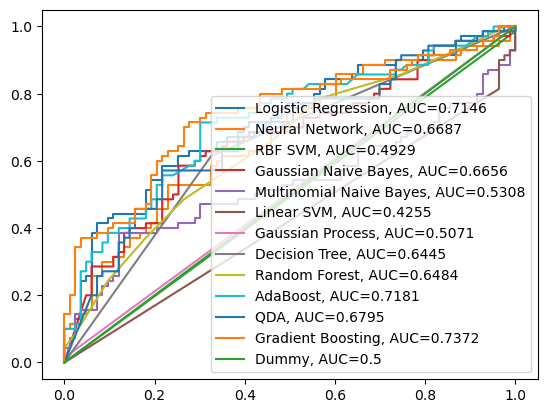

In [52]:
plt.figure(0).clf()
for name in y_probas.keys():
    y_proba = y_probas[name][:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = round(metrics.roc_auc_score(y_test, y_proba), 4)
    plt.plot(fpr,tpr,label=f"{name}, AUC={auc}")
plt.legend()

In [53]:
print(f'Train size \t{len(y_train)} = {int(len(y_train)-y_train.sum())} False + {int(y_train.sum())} True' )
print(f'Test size \t{len(y_test)} = {int(len(y_test)-y_test.sum())} False + {int(y_test.sum())} True\n' )
pd.options.display.float_format = '{:,.4f}'.format

Train size 	458 = 229 False + 229 True
Test size 	153 = 83 False + 70 True



<AxesSubplot: xlabel='roc_auc', ylabel='f1'>

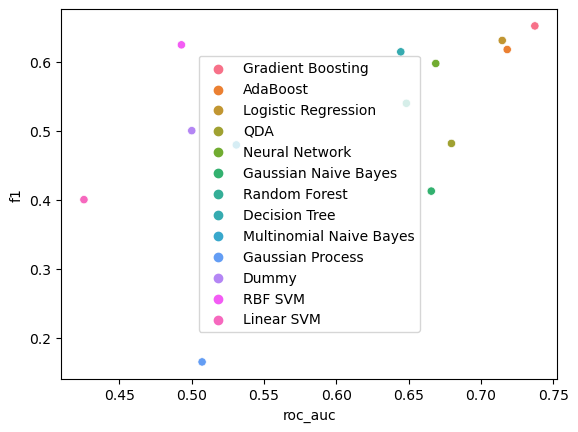

In [54]:
sns.scatterplot(df_bench,y='f1',x='roc_auc',hue=df_bench.index)

In [ ]:
df_bench

# Sauvegarde des résultats
---

# Conclusions
---
- Création de features linguistiques

# Bricolages
---

- 